In [1]:
import math
from tensorboardX import SummaryWriter
sess = None

In [2]:
import tensorflow as tf
import collections
gpu_options = tf.GPUOptions(allow_growth=True,per_process_gpu_memory_fraction=0.8)
tf.reset_default_graph()
sess = tf.InteractiveSession(config=tf.ConfigProto(gpu_options=gpu_options))

In [3]:
from gym import envs
print(envs.registry.all())

dict_values([EnvSpec(Copy-v0), EnvSpec(RepeatCopy-v0), EnvSpec(ReversedAddition-v0), EnvSpec(ReversedAddition3-v0), EnvSpec(DuplicatedInput-v0), EnvSpec(Reverse-v0), EnvSpec(CartPole-v0), EnvSpec(CartPole-v1), EnvSpec(MountainCar-v0), EnvSpec(MountainCarContinuous-v0), EnvSpec(Pendulum-v0), EnvSpec(Acrobot-v1), EnvSpec(LunarLander-v2), EnvSpec(LunarLanderContinuous-v2), EnvSpec(BipedalWalker-v2), EnvSpec(BipedalWalkerHardcore-v2), EnvSpec(CarRacing-v0), EnvSpec(Blackjack-v0), EnvSpec(KellyCoinflip-v0), EnvSpec(KellyCoinflipGeneralized-v0), EnvSpec(FrozenLake-v0), EnvSpec(FrozenLake8x8-v0), EnvSpec(CliffWalking-v0), EnvSpec(NChain-v0), EnvSpec(Roulette-v0), EnvSpec(Taxi-v2), EnvSpec(GuessingGame-v0), EnvSpec(HotterColder-v0), EnvSpec(Reacher-v2), EnvSpec(Pusher-v2), EnvSpec(Thrower-v2), EnvSpec(Striker-v2), EnvSpec(InvertedPendulum-v2), EnvSpec(InvertedDoublePendulum-v2), EnvSpec(HalfCheetah-v2), EnvSpec(Hopper-v2), EnvSpec(Swimmer-v2), EnvSpec(Walker2d-v2), EnvSpec(Ant-v2), EnvSpec(Hum

4
WARN: <class 'wrappers.FrameStack'> doesn't implement 'reset' method, but it implements deprecated '_reset' method.
done


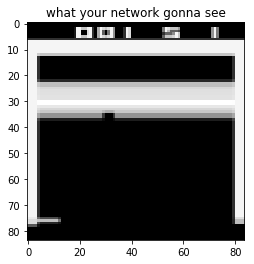

In [4]:
from wrappers import make_atari_deepmind
import gym
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
env_name1 = "PongNoFrameskip-v4"
env_name = "BreakoutNoFrameskip-v4"
env = make_atari_deepmind(env_name)
observation_shape = env.observation_space.shape
n_actions = env.action_space.n
print(n_actions)
obs = env.reset()
obs, r, done, _ = env.step(2)
#print(obs.shape)
#print(is_done)
done = False
for _ in range(2000):
    obs, _, done, _ = env.step(3)
    if done:
        print('done')
        break
plt.title("what your network gonna see")
plt.imshow(obs[:,:,0],interpolation='none',cmap='gray');

In [5]:

from dqnagent import DQNAgent
from dqnagent import ExperienceBuffer
import networks
EXP_BUFFER_CAPACITY = 100000

#agent.epsilon = 0.5

breakout_dqn_config = {
    'GAMMA' : 0.99,
    'LEARNING_RATE' : 1e-4,
    'STEPS_PER_EPOCH' : 5 *4,
    'BATCH_SIZE' : 32 * 5,
    'EPSILON' : 0.9,
    'MIN_EPSILON' : 0.02,
    'NUM_EPOCHS_TO_COPY' : 1000,
    'EPS_DECAY_RATE' : 0.99,
    'NAME' : 'DDDQN',
    'IS_DOUBLE' : True,
    'DUELING_TYPE' : 'AVERAGE',
    'SCORE_TO_WIN' : 300,
    'NUM_STEPS_FILL_BUFFER' : 10000,
    'NETWORK' : networks.AtariDQN()
    }


breakout_noisy_dddqn_config = {
    'GAMMA' : 0.99,
    'LEARNING_RATE' : 1e-4,
    'STEPS_PER_EPOCH' : 5,
    'BATCH_SIZE' : 32 * 5,
    'EPSILON' : 0.0,
    'MIN_EPSILON' : 0.00,
    'NUM_EPOCHS_TO_COPY' : 1000,
    'EPS_DECAY_RATE' : 0.0,
    'NAME' : 'NOISYDDDQN',
    'IS_DOUBLE' : True,
    'DUELING_TYPE' : 'AVERAGE',
    'SCORE_TO_WIN' : 300,
    'NUM_STEPS_FILL_BUFFER' : 10000,
    'NETWORK' : networks.AtariNoisyDuelingDQN()
    }
agent = DQNAgent(env, sess, ExperienceBuffer(EXP_BUFFER_CAPACITY), env_name, config = breakout_dqn_config)
#agent.restore('nn/NOISYDDDQNBreakoutNoFrameskip-v4')
#agent.epsilon = 0.02

In [6]:
env.reset()
agent.train()

460
saving next best rewards:  0.5
700
Frames per seconds:  343.38256266973445
1240
saving next best rewards:  0.7
1640
Frames per seconds:  357.97078900380467
2020
2240
2600
2900
Frames per seconds:  343.0108708737
3200
3560
3900
Frames per seconds:  347.0664829901756
4580
saving next best rewards:  1.1
4800
Frames per seconds:  350.3405758533441
5060
5400
5780
Frames per seconds:  339.8896597484334
6140
6520
Frames per seconds:  348.27164248828615
7000
7500
7840
Frames per seconds:  328.3151358902276
8180
8520
8880
Frames per seconds:  330.6973028598749
9180
9440
9840
Frames per seconds:  336.12676045050864
10380
10700
Frames per seconds:  345.5086513000324
11320
11880
Frames per seconds:  350.225112293121
12260
12540
Frames per seconds:  343.56451758363374
13120
13400
13700
Frames per seconds:  332.2178887237865
14060
14400
14800
Frames per seconds:  333.11455578096917
15140
15480
15720
Frames per seconds:  334.11021205459383
16080
16420
16920
Frames per seconds:  332.16653182453757

Frames per seconds:  282.25272493100823
156060
Frames per seconds:  262.6864968697542
157160
Frames per seconds:  258.88834956010686
158120
Frames per seconds:  262.2037988538761
159360
Frames per seconds:  267.30851750568627
160300
Frames per seconds:  267.0928294912282
161320
Frames per seconds:  284.45243077978125
162400
Frames per seconds:  284.725373634237
163740
Frames per seconds:  279.2861845327286
164960
Frames per seconds:  280.45450664212433
165980
Frames per seconds:  282.5983826222003
Frames per seconds:  284.02861804156623
167080
Frames per seconds:  283.7720408050044
168200
Frames per seconds:  282.7217049215423
169460
Frames per seconds:  286.4902650232215
170220
Frames per seconds:  276.828780608764
171240
Frames per seconds:  268.52550871460255
172260
Frames per seconds:  272.688063434843
173380
Frames per seconds:  262.3427574315991
174360
Frames per seconds:  269.3189427872285
175200
Frames per seconds:  272.243873366574
176580
Frames per seconds:  265.0474289292771

334100
Frames per seconds:  267.519725279579
335480
Frames per seconds:  270.08566645794605
336960
Frames per seconds:  268.52334261594484
Frames per seconds:  270.7222402661948
338820
Frames per seconds:  269.85828705680643
Frames per seconds:  268.64758873278623
340300
Frames per seconds:  267.22423330233994
Frames per seconds:  265.8513468793602
342100
Frames per seconds:  270.11704481170716
Frames per seconds:  268.5820631306523
344060
Frames per seconds:  268.4234649869721
345880
Frames per seconds:  269.1660890454197
Frames per seconds:  268.5027492330238
347540
Frames per seconds:  269.34540389346074
Frames per seconds:  266.84543293805876
349240
Frames per seconds:  270.33172273967597
Frames per seconds:  269.9140494816855
351080
Frames per seconds:  269.07222294963253
352840
Frames per seconds:  269.6811672477508
Frames per seconds:  270.919768604522
354800
Frames per seconds:  269.0881217047274
Frames per seconds:  270.4317180389512
Frames per seconds:  268.94680779301854
357

522540
Frames per seconds:  258.15327308962577
Frames per seconds:  258.20948456466755
Frames per seconds:  257.1027454364046
525100
Frames per seconds:  257.364531540609
Frames per seconds:  258.5318097129291
527140
Frames per seconds:  256.78944259240336
528740
Frames per seconds:  256.71612266052716
Frames per seconds:  257.363236602082
530840
Frames per seconds:  257.2309688790872
Frames per seconds:  254.3247690793571
532740
Frames per seconds:  258.8466176494185
Frames per seconds:  254.79400510851076
Frames per seconds:  257.6323740693444
535540
saving next best rewards:  7.8
Frames per seconds:  255.64346599133899
Frames per seconds:  255.23480965481963
537740
Frames per seconds:  251.55980967766934
Frames per seconds:  251.34378881269222
539460
Frames per seconds:  251.72756073567538
Frames per seconds:  254.10355986976592
541820
Frames per seconds:  251.27714303378923
Frames per seconds:  252.32840911490464
543800
Frames per seconds:  252.52921832458586
Frames per seconds:  2

Frames per seconds:  238.0699094917451
713060
Frames per seconds:  234.14505178060156
714980
Frames per seconds:  236.60165368845904
Frames per seconds:  235.7171996510919
Frames per seconds:  237.44621049954745
717360
Frames per seconds:  238.65049908706015
Frames per seconds:  234.90748961741025
719120
Frames per seconds:  235.29253370037955
Frames per seconds:  236.15822625482622
721120
Frames per seconds:  236.33488626517703
Frames per seconds:  236.8164108540328
723000
Frames per seconds:  236.20123585000067
Frames per seconds:  237.0902575741851
725380
Frames per seconds:  237.92268277465357
Frames per seconds:  233.9218676164002
727660
Frames per seconds:  234.2724591183973
Frames per seconds:  238.46111512118222
729940
Frames per seconds:  234.3443847327374
Frames per seconds:  234.45384347030486
Frames per seconds:  235.81235262444793
732180
Frames per seconds:  237.02808890090458
Frames per seconds:  234.62157008293948
Frames per seconds:  237.15786280501683
735280
saving nex

902540
Frames per seconds:  219.88471410820458
Frames per seconds:  219.9329436666918
Frames per seconds:  220.9983945846356
905160
Frames per seconds:  219.32297176251458
Frames per seconds:  219.57934076735793
907380
Frames per seconds:  220.42362202390555
Frames per seconds:  219.30754765371265
Frames per seconds:  218.2515302387329
910560
Frames per seconds:  220.173738819801
Frames per seconds:  220.35407082257035
Frames per seconds:  219.37479889485795
913120
Frames per seconds:  219.782559940641
Frames per seconds:  219.79780905660647
915520
Frames per seconds:  216.81288414103892
Frames per seconds:  219.2475117681485
917860
Frames per seconds:  219.63073710985643
Frames per seconds:  220.83626009677445
Frames per seconds:  219.09924246468677
920160
Frames per seconds:  219.07741871962864
Frames per seconds:  218.03106847493538
922260
Frames per seconds:  219.81408556080734
Frames per seconds:  219.68168576765407
924860
Frames per seconds:  219.8529607943151
Frames per seconds:

Frames per seconds:  212.39258911955272
1097860
Frames per seconds:  211.43487383107396
Frames per seconds:  211.3268844845212
1099640
Frames per seconds:  212.34855567376593
Frames per seconds:  212.84762528947894
Frames per seconds:  214.53089294594884
Frames per seconds:  211.93709552521244
1103540
Frames per seconds:  212.49444674312028
Frames per seconds:  212.39563288703437
Frames per seconds:  213.62449623747128
1106820
Frames per seconds:  211.401443614995
Frames per seconds:  212.85271284312145
Frames per seconds:  212.60014139875278
Frames per seconds:  212.79681710693407
1110060
Frames per seconds:  211.2167929855324
Frames per seconds:  211.25037761919646
1112620
Frames per seconds:  211.9045554863741
Frames per seconds:  212.88819205853645
Frames per seconds:  211.58861618715184
Frames per seconds:  212.54360273909018
1116100
Frames per seconds:  212.9130259012208
Frames per seconds:  210.8441226860982
1118960
Frames per seconds:  212.67977528972983
Frames per seconds:  21

Frames per seconds:  202.12697926353525
Frames per seconds:  200.4133739903128
1292040
Frames per seconds:  201.86113643817922
Frames per seconds:  199.16996685204813
Frames per seconds:  200.22579861341512
1295900
Frames per seconds:  201.2039026890339
Frames per seconds:  201.65949795232362
Frames per seconds:  200.70562485315432
Frames per seconds:  202.28078444339127
1299580
Frames per seconds:  198.95664904631772
Frames per seconds:  201.57892042943675
1301960
Frames per seconds:  199.71061676872407
Frames per seconds:  202.33020810329225
Frames per seconds:  200.59660011015274
Frames per seconds:  200.86357414415164
1305200
Frames per seconds:  200.5638428919497
Frames per seconds:  201.6929923304994
Frames per seconds:  200.2927576971861
1308360
Frames per seconds:  201.31969559250777
Frames per seconds:  201.71020931712434
Frames per seconds:  199.70571966863062
1311700
Frames per seconds:  200.45056529987673
Frames per seconds:  201.2581706622363
Frames per seconds:  200.88089

1484280
Frames per seconds:  198.55496170117362
Frames per seconds:  196.95172384129265
Frames per seconds:  197.64917260552943
1487860
Frames per seconds:  198.0819931063584
Frames per seconds:  197.20905004505764
Frames per seconds:  197.09493535623102
Frames per seconds:  196.5057586678456
Frames per seconds:  196.7224402058016
1492400
Frames per seconds:  196.31174104379727
Frames per seconds:  196.37114265067314
1494980
Frames per seconds:  197.80948243320665
Frames per seconds:  199.322002646504
Frames per seconds:  196.25969424076166
Frames per seconds:  193.78111205386853
1498100
Frames per seconds:  196.58140007930177
Frames per seconds:  197.12168679568413
Frames per seconds:  196.87962312629972
1501900
Frames per seconds:  193.08002370559907
Frames per seconds:  197.9559438831327
Frames per seconds:  195.53518399207846
1504320
Frames per seconds:  197.74692340535313
Frames per seconds:  196.32878672127214
Frames per seconds:  196.54596210967847
1507640
Frames per seconds:  1

Frames per seconds:  191.31883244125342
1681160
Frames per seconds:  191.2956044924847
Frames per seconds:  189.54149331512468
Frames per seconds:  192.2976217662563
Frames per seconds:  189.95784591096913
1685820
Frames per seconds:  191.47769619996822
Frames per seconds:  190.188568228287
Frames per seconds:  190.13607116684406
Frames per seconds:  191.05839544900365
Frames per seconds:  191.03592677158974
1690260
Frames per seconds:  190.41954047749527
Frames per seconds:  192.48016953180826
Frames per seconds:  192.08430066918712
Frames per seconds:  191.70574852515193
1694300
Frames per seconds:  191.5751939341294
Frames per seconds:  192.41834901241123
Frames per seconds:  189.82379256560168
Frames per seconds:  192.10241495172116
1698420
Frames per seconds:  192.00936373789224
Frames per seconds:  191.44898530491335
Frames per seconds:  190.70684775744502
Frames per seconds:  188.99060378346726
1702880
Frames per seconds:  191.20667145302116
Frames per seconds:  191.354330964434

Frames per seconds:  186.35345560415175
Frames per seconds:  182.08440185485148
Frames per seconds:  181.7909470682548
1879560
Frames per seconds:  184.17968978993488
Frames per seconds:  186.52407429239278
Frames per seconds:  185.13390668894527
Frames per seconds:  185.28463360013006
1883720
Frames per seconds:  185.67841439470945
Frames per seconds:  187.80571067085393
Frames per seconds:  184.94992427039148
Frames per seconds:  187.50699356205592
Frames per seconds:  183.16030727827354
1888640
Frames per seconds:  184.47304326837207
Frames per seconds:  184.44036805367293
Frames per seconds:  185.69699307343748
Frames per seconds:  182.6270198819559
Frames per seconds:  185.53421088694583
1893720
Frames per seconds:  184.83270679557776
Frames per seconds:  186.67418294016878
Frames per seconds:  185.43818045717853
Frames per seconds:  186.14380115282742
1897720
Frames per seconds:  185.7893991043332
Frames per seconds:  186.71773654318548
Frames per seconds:  187.62999559410136
Fra

2071400
Frames per seconds:  184.48027264155283
Frames per seconds:  182.35457385511887
Frames per seconds:  184.3129172721732
Frames per seconds:  185.90653984569545
Frames per seconds:  184.47879588852342
Frames per seconds:  184.85092923609258
2077240
Frames per seconds:  185.12451789018894
Frames per seconds:  185.2335977909955
Frames per seconds:  184.96089401340328
Frames per seconds:  184.01721440944277
Frames per seconds:  185.03695132733876
Frames per seconds:  185.0377921341521
Frames per seconds:  184.04559682200775
2084420
saving next best rewards:  23.6
Frames per seconds:  186.69565388084047
Frames per seconds:  180.7912643716806
Frames per seconds:  182.14076402208528
Frames per seconds:  183.43840915757534
Frames per seconds:  183.80994535183862
2089920
Frames per seconds:  181.69247835529714
Frames per seconds:  184.1143726540178
Frames per seconds:  181.99706517374514
Frames per seconds:  183.28652087398697
Frames per seconds:  178.1205129380055
Frames per seconds:  1

Frames per seconds:  181.534791819702
Frames per seconds:  180.69453704452036
2271240
Frames per seconds:  179.99032825942442
Frames per seconds:  180.43533559163723
Frames per seconds:  179.3817619862939
Frames per seconds:  180.62311923767237
2275660
Frames per seconds:  180.50042158898833
Frames per seconds:  180.4816333014996
Frames per seconds:  181.7147315818672
Frames per seconds:  180.63434407590503
Frames per seconds:  181.35263608774358
Frames per seconds:  179.460893025784
2281480
Frames per seconds:  182.50018002855654
Frames per seconds:  181.25879299641548
Frames per seconds:  180.3088078251618
Frames per seconds:  179.98609564430458
Frames per seconds:  179.64319040828002
2286480
Frames per seconds:  180.58856669613826
Frames per seconds:  178.9385328402428
Frames per seconds:  181.96298757578748
Frames per seconds:  180.99451130989146
Frames per seconds:  180.14685070378883
2291340
Frames per seconds:  179.70398720278155
Frames per seconds:  179.97454964998045
Frames pe

2468760
Frames per seconds:  174.0117118735882
Frames per seconds:  176.12668713378625
Frames per seconds:  172.26281029649522
Frames per seconds:  175.38845266577817
Frames per seconds:  175.13972790587067
Frames per seconds:  174.3919892272313
2474640
Frames per seconds:  173.6363383835049
Frames per seconds:  174.71881952291722
Frames per seconds:  174.6819053990705
Frames per seconds:  175.50239463485303
Frames per seconds:  173.16043480843854
Frames per seconds:  175.92459732062852
2480960
Frames per seconds:  174.27854990146537
Frames per seconds:  172.5619481909812
Frames per seconds:  173.31074864858198
Frames per seconds:  173.59313356063254
Frames per seconds:  174.6558573325804
2485360
Frames per seconds:  175.3562988839761
Frames per seconds:  171.60124267280207
Frames per seconds:  174.5538493513031
Frames per seconds:  172.89442711869773
Frames per seconds:  174.04939773064999
Frames per seconds:  175.3931685674231
2491480
Frames per seconds:  173.29785213004973
Frames pe

Frames per seconds:  170.04402296619853
Frames per seconds:  169.32022091578887
Frames per seconds:  168.92542060347677
Frames per seconds:  169.5379177579997
2670780
Frames per seconds:  170.60918603270056
Frames per seconds:  170.03175277018363
Frames per seconds:  170.07012714963054
Frames per seconds:  169.88163461918955
Frames per seconds:  169.42124541118412
Frames per seconds:  169.40578059971034
2676120
Frames per seconds:  169.61664604036721
Frames per seconds:  172.1243517745149
Frames per seconds:  170.82392254327877
Frames per seconds:  169.5998768164957
Frames per seconds:  169.57109909321613
2681060
Frames per seconds:  170.66856946565892
Frames per seconds:  171.29229196856244
Frames per seconds:  169.28491027238326
Frames per seconds:  168.8531987028634
Frames per seconds:  171.93757470482294
2686380
Frames per seconds:  169.66242335052365
Frames per seconds:  169.40427532637545
Frames per seconds:  169.90080642753708
Frames per seconds:  170.8130281879713
Frames per se

Frames per seconds:  167.30080003395233
2866620
Frames per seconds:  169.17010733214562
Frames per seconds:  168.4897511103891
Frames per seconds:  169.53270286882787
Frames per seconds:  169.31345423660667
Frames per seconds:  168.177535130679
Frames per seconds:  165.60027267973976
2872040
Frames per seconds:  168.3246824034958
Frames per seconds:  168.34174767007667
Frames per seconds:  169.17066001218876
Frames per seconds:  166.12432629269142
Frames per seconds:  166.80917065779258
Frames per seconds:  168.22102753218468
2878260
Frames per seconds:  168.2027590632018
Frames per seconds:  168.78357192506087
Frames per seconds:  168.3469638734495
Frames per seconds:  166.06067886180583
2882560
Frames per seconds:  167.46734264161742
Frames per seconds:  167.47485863095832
Frames per seconds:  169.17974904644635
Frames per seconds:  167.62730988897874
2886860
Frames per seconds:  168.82750070691895
Frames per seconds:  167.29763698246293
Frames per seconds:  167.36367881638643
Frames

KeyboardInterrupt: 

In [ ]:
#agent.epsilon = 0.2
#agent.train()
import wrappers

In [ ]:

print(env.unwrapped.get_action_meanings())
def evaluate(env,t_max=10000):
    rewards = []
    print('reset')
    s = env.reset()
    reward = 0
    for it in range(t_max):
        #e.render()
        qvalues = agent.get_qvalues([s])
        action = np.argmax(qvalues)
        s, r, done, _ = env.step(action)
        reward += r
        rewards.append(reward)
        
            
        if done:
            
            break       
        
    return np.mean(rewards)

import gym.wrappers
env_monitor = make_atari_deepmind(env_name)
env_monitor = gym.wrappers.Monitor(env,directory='video_dddqn',force=True)
sessions = [evaluate(env_monitor) for _ in range(10)]
env_monitor.close()

In [ ]:
#tf.reset_default_graph()
#agent = DQNAgent(env, sess, ExperienceBuffer(EXP_BUFFER_CAPACITY), env_name, config = dqn_config)

In [ ]:
#env.reset()
#agent.train()